In [540]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import seaborn as sns
# To Plot matplotlib figures inline on the notebook
%matplotlib inline


from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV


#This is for displaying the tree (we shouldn't need these now)
#!pip install pydotplus
#!pip install GraphViz
#import pydotplus as pydot
#from IPython.display import Image
from sklearn.externals.six import StringIO

# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

In [541]:
datafile = 'ModelData1.csv'

df = pd.read_csv(datafile)
df

,Unnamed: 0,ID_num,Name,applicationCategory,OS_windows,OS_mac,OS_linux,SteamPlay,Release_Date,worstRating,bestRating,ratingValue,reviewCount,Price,Lowest_Price,Max_Sale,controller_support,metacritic_score,community_visible_stats,workshop_visible,releasestate,languages_num,community_hub_visible,owners,owners_unc,players_total,owners_played_percent,players_2_weeks,players_2_weeks_percent,median_total_playtime,average_total_playtime,Packages,DLCs,Depots,genre_Action,genre_Indie,genre_Strategy,genre_Simulation,genre_RPG,genre_Adventure,genre_Casual,genre_Early Access,genre_Racing,genre_Sports,genre_Free to Play,genre_Massively Multiplayer,owners_log
0,0,10,Counter-Strike,0,1,1,1,1,2000-11-01,0.0,100.0,97.74,93913.0,9.99,2.49,75.0,0,88.0,0,-1,-1,0,0,1.344e+07,96036.0,9.427e+06,70.13,361920.0,2.69,6.9,185.9,65,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,7.128
1,1,1002,Rag Doll Kung Fu,0,-1,-1,-1,0,2005-10-12,NaN,NaN,NaN,NaN,9.99,2.49,75.0,0,69.0,-1,-1,-1,0,0,3.935e+04,5282.0,1.188e+04,30.19,0.0,0.00,NaN,1.1,4,1,2.0,0,1,0,0,0,0,0,0,0,0,0,0,4.595
2,2,10090,Call of Duty: World at War,0,-1,-1,-1,0,2008-11-18,0.0,100.0,92.69,16971.0,19.99,9.79,51.0,0,83.0,0,-1,-1,0,0,1.674e+06,34382.0,1.424e+06,85.07,106163.0,6.34,12.5,42.1,41,0,7.0,1,0,0,0,0,0,0,0,0,0,0,0,6.224
3,3,10130,TimeShift,0,-1,-1,-1,0,2007-10-30,0.0,100.0,76.69,653.0,19.99,4.99,75.0,0,71.0,0,-1,-1,0,0,1.340e+05,9746.0,5.549e+04,41.41,1172.0,0.87,1.1,3.1,6,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,5.127
4,4,10180,Call of Duty: Modern Warfare 2,0,-1,-1,-1,0,2009-11-12,0.0,100.0,90.93,26992.0,19.99,9.79,51.0,0,86.0,0,-1,-1,8,0,5.246e+06,60607.0,4.687e+06,89.33,70157.0,1.34,9.4,23.5,37,0,18.0,1,0,0,0,0,0,0,0,0,0,0,0,6.720
5,5,10220,Postal 3,0,-1,-1,-1,0,2011-12-21,NaN,NaN,NaN,NaN,11.99,4.79,60.0,0,24.0,0,-1,-1,2,0,7.830e+04,8137.0,6.901e+04,88.14,2491.0,3.18,2.1,7.1,3,0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,4.894
6,6,102400,Vertex Dispenser,0,1,1,0,1,2011-06-10,NaN,NaN,NaN,NaN,9.99,4.99,50.0,0,70.0,0,-1,-1,0,0,3.304e+04,4840.0,1.299e+04,39.33,0.0,0.00,NaN,NaN,5,1,2.0,1,1,1,0,0,0,0,0,0,0,0,0,4.519
7,7,10250,PT Boats: Knights of the Sea,0,-1,-1,-1,0,2009-01-30,NaN,NaN,NaN,NaN,6.99,2.49,75.0,0,NaN,-1,-1,-1,0,0,1.151e+04,2856.0,9.837e+03,85.49,0.0,0.00,1.4,2.7,4,0,3.0,0,0,0,1,0,0,0,0,0,0,0,0,4.061
8,8,102500,Kingdoms of Amalur: Reckoning™,0,-1,-1,-1,0,2012-02-07,0.0,100.0,87.28,7748.0,19.99,4.39,78.0,3,81.0,0,-1,-1,5,0,8.919e+05,27437.0,7.470e+05,83.76,19465.0,2.18,9.2,26.6,6,4,13.0,1,0,0,0,1,0,0,0,0,0,0,0,5.950
9,9,10260,PT Boats: South Gambit,0,-1,-1,-1,0,2010-12-10,NaN,NaN,NaN,NaN,6.99,2.49,75.0,0,NaN,-1,-1,-1,0,0,1.132e+04,2833.0,6.867e+03,60.65,0.0,0.00,NaN,2.0,4,0,3.0,0,0,0,1,0,0,0,0,0,0,0,0,4.054


In [542]:
#convert Release_Date column to a datetime object
from dateutil.parser import *

def toDT(d):
    #print(d)
    if d == np.nan or d == 'nan': return np.nan
    try:
        date = parse(d)
        return date.timestamp()
    except (ValueError,TypeError):
        print("unparsable data:",d)
        return np.nan

df['Release_Date'] = df['Release_Date'].map(toDT)
df.head()
#note, can't re-run this without the code above, as it changes data in place

unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable da

,Unnamed: 0,ID_num,Name,applicationCategory,OS_windows,OS_mac,OS_linux,SteamPlay,Release_Date,worstRating,bestRating,ratingValue,reviewCount,Price,Lowest_Price,Max_Sale,controller_support,metacritic_score,community_visible_stats,workshop_visible,releasestate,languages_num,community_hub_visible,owners,owners_unc,players_total,owners_played_percent,players_2_weeks,players_2_weeks_percent,median_total_playtime,average_total_playtime,Packages,DLCs,Depots,genre_Action,genre_Indie,genre_Strategy,genre_Simulation,genre_RPG,genre_Adventure,genre_Casual,genre_Early Access,genre_Racing,genre_Sports,genre_Free to Play,genre_Massively Multiplayer,owners_log
0,0,10,Counter-Strike,0,1,1,1,1,9.731e+08,0.0,100.0,97.74,93913.0,9.99,2.49,75.0,0,88.0,0,-1,-1,0,0,1.344e+07,96036.0,9.427e+06,70.13,361920.0,2.69,6.9,185.9,65,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,7.128
1,1,1002,Rag Doll Kung Fu,0,-1,-1,-1,0,1.129e+09,NaN,NaN,NaN,NaN,9.99,2.49,75.0,0,69.0,-1,-1,-1,0,0,3.935e+04,5282.0,1.188e+04,30.19,0.0,0.00,NaN,1.1,4,1,2.0,0,1,0,0,0,0,0,0,0,0,0,0,4.595
2,2,10090,Call of Duty: World at War,0,-1,-1,-1,0,1.227e+09,0.0,100.0,92.69,16971.0,19.99,9.79,51.0,0,83.0,0,-1,-1,0,0,1.674e+06,34382.0,1.424e+06,85.07,106163.0,6.34,12.5,42.1,41,0,7.0,1,0,0,0,0,0,0,0,0,0,0,0,6.224
3,3,10130,TimeShift,0,-1,-1,-1,0,1.194e+09,0.0,100.0,76.69,653.0,19.99,4.99,75.0,0,71.0,0,-1,-1,0,0,1.340e+05,9746.0,5.549e+04,41.41,1172.0,0.87,1.1,3.1,6,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,5.127
4,4,10180,Call of Duty: Modern Warfare 2,0,-1,-1,-1,0,1.258e+09,0.0,100.0,90.93,26992.0,19.99,9.79,51.0,0,86.0,0,-1,-1,8,0,5.246e+06,60607.0,4.687e+06,89.33,70157.0,1.34,9.4,23.5,37,0,18.0,1,0,0,0,0,0,0,0,0,0,0,0,6.720


In [543]:
df.Release_Date

0       9.731e+08
1       1.129e+09
2       1.227e+09
3       1.194e+09
4       1.258e+09
5       1.324e+09
6       1.308e+09
7       1.233e+09
8       1.329e+09
9       1.292e+09
10      1.318e+09
11      1.392e+09
          ...    
6986    1.237e+09
6987    1.306e+09
6988    1.252e+09
6989    1.311e+09
6990    1.265e+09
6991    1.309e+09
6992    1.304e+09
6993    1.297e+09
6994    1.320e+09
6995    1.285e+09
6996    1.308e+09
6997    1.315e+09
Name: Release_Date, Length: 6998, dtype: float64

In [544]:
#filter filter out free and price errored games, and set all NaN to -1

df = df.fillna(value=-1)
Adf = df.loc[df['Price'] >= 0,:]
df

,Unnamed: 0,ID_num,Name,applicationCategory,OS_windows,OS_mac,OS_linux,SteamPlay,Release_Date,worstRating,bestRating,ratingValue,reviewCount,Price,Lowest_Price,Max_Sale,controller_support,metacritic_score,community_visible_stats,workshop_visible,releasestate,languages_num,community_hub_visible,owners,owners_unc,players_total,owners_played_percent,players_2_weeks,players_2_weeks_percent,median_total_playtime,average_total_playtime,Packages,DLCs,Depots,genre_Action,genre_Indie,genre_Strategy,genre_Simulation,genre_RPG,genre_Adventure,genre_Casual,genre_Early Access,genre_Racing,genre_Sports,genre_Free to Play,genre_Massively Multiplayer,owners_log
0,0,10,Counter-Strike,0,1,1,1,1,9.731e+08,0.0,100.0,97.74,93913.0,9.99,2.49,75.0,0,88.0,0,-1,-1,0,0,1.344e+07,96036.0,9.427e+06,70.13,361920.0,2.69,6.9,185.9,65,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,7.128
1,1,1002,Rag Doll Kung Fu,0,-1,-1,-1,0,1.129e+09,-1.0,-1.0,-1.00,-1.0,9.99,2.49,75.0,0,69.0,-1,-1,-1,0,0,3.935e+04,5282.0,1.188e+04,30.19,0.0,0.00,-1.0,1.1,4,1,2.0,0,1,0,0,0,0,0,0,0,0,0,0,4.595
2,2,10090,Call of Duty: World at War,0,-1,-1,-1,0,1.227e+09,0.0,100.0,92.69,16971.0,19.99,9.79,51.0,0,83.0,0,-1,-1,0,0,1.674e+06,34382.0,1.424e+06,85.07,106163.0,6.34,12.5,42.1,41,0,7.0,1,0,0,0,0,0,0,0,0,0,0,0,6.224
3,3,10130,TimeShift,0,-1,-1,-1,0,1.194e+09,0.0,100.0,76.69,653.0,19.99,4.99,75.0,0,71.0,0,-1,-1,0,0,1.340e+05,9746.0,5.549e+04,41.41,1172.0,0.87,1.1,3.1,6,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,5.127
4,4,10180,Call of Duty: Modern Warfare 2,0,-1,-1,-1,0,1.258e+09,0.0,100.0,90.93,26992.0,19.99,9.79,51.0,0,86.0,0,-1,-1,8,0,5.246e+06,60607.0,4.687e+06,89.33,70157.0,1.34,9.4,23.5,37,0,18.0,1,0,0,0,0,0,0,0,0,0,0,0,6.720
5,5,10220,Postal 3,0,-1,-1,-1,0,1.324e+09,-1.0,-1.0,-1.00,-1.0,11.99,4.79,60.0,0,24.0,0,-1,-1,2,0,7.830e+04,8137.0,6.901e+04,88.14,2491.0,3.18,2.1,7.1,3,0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,4.894
6,6,102400,Vertex Dispenser,0,1,1,0,1,1.308e+09,-1.0,-1.0,-1.00,-1.0,9.99,4.99,50.0,0,70.0,0,-1,-1,0,0,3.304e+04,4840.0,1.299e+04,39.33,0.0,0.00,-1.0,-1.0,5,1,2.0,1,1,1,0,0,0,0,0,0,0,0,0,4.519
7,7,10250,PT Boats: Knights of the Sea,0,-1,-1,-1,0,1.233e+09,-1.0,-1.0,-1.00,-1.0,6.99,2.49,75.0,0,-1.0,-1,-1,-1,0,0,1.151e+04,2856.0,9.837e+03,85.49,0.0,0.00,1.4,2.7,4,0,3.0,0,0,0,1,0,0,0,0,0,0,0,0,4.061
8,8,102500,Kingdoms of Amalur: Reckoning™,0,-1,-1,-1,0,1.329e+09,0.0,100.0,87.28,7748.0,19.99,4.39,78.0,3,81.0,0,-1,-1,5,0,8.919e+05,27437.0,7.470e+05,83.76,19465.0,2.18,9.2,26.6,6,4,13.0,1,0,0,0,1,0,0,0,0,0,0,0,5.950
9,9,10260,PT Boats: South Gambit,0,-1,-1,-1,0,1.292e+09,-1.0,-1.0,-1.00,-1.0,6.99,2.49,75.0,0,-1.0,-1,-1,-1,0,0,1.132e+04,2833.0,6.867e+03,60.65,0.0,0.00,-1.0,2.0,4,0,3.0,0,0,0,1,0,0,0,0,0,0,0,0,4.054


# Separating features and target variables

In [545]:
df.columns

Index(['Unnamed: 0', 'ID_num', 'Name', 'applicationCategory', 'OS_windows',
       'OS_mac', 'OS_linux', 'SteamPlay', 'Release_Date', 'worstRating',
       'bestRating', 'ratingValue', 'reviewCount', 'Price', 'Lowest_Price',
       'Max_Sale', 'controller_support', 'metacritic_score',
       'community_visible_stats', 'workshop_visible', 'releasestate',
       'languages_num', 'community_hub_visible', 'owners', 'owners_unc',
       'players_total', 'owners_played_percent', 'players_2_weeks',
       'players_2_weeks_percent', 'median_total_playtime',
       'average_total_playtime', 'Packages', 'DLCs', 'Depots', 'genre_Action',
       'genre_Indie', 'genre_Strategy', 'genre_Simulation', 'genre_RPG',
       'genre_Adventure', 'genre_Casual', 'genre_Early Access', 'genre_Racing',
       'genre_Sports', 'genre_Free to Play', 'genre_Massively Multiplayer',
       'owners_log'],
      dtype='object')

In [548]:
feature_columns = ['OS_windows', 'OS_mac',
       'OS_linux', 'SteamPlay', 'Release_Date', 'worstRating', 'bestRating',
       'ratingValue', 'Price', 'Lowest_Price', 'Max_Sale',
       'controller_support', 'metacritic_score', 'community_visible_stats',
       'workshop_visible', 'releasestate', 'languages_num',
       'community_hub_visible', 
       'owners_played_percent', 'players_2_weeks_percent',
       'median_total_playtime', 'average_total_playtime', 'Packages', 'DLCs',
       'Depots', 'genre_Action', 'genre_RPG', 'genre_Indie', 'genre_Strategy',
       'genre_Adventure', 'genre_Simulation', 'genre_Casual',
       'genre_Early Access', 'genre_Racing', 'genre_Free to Play',
       'genre_Sports', 'genre_Massively Multiplayer']

"""removed columns, due to 'cheating' correlation with owners
'reviewCount', 'owners', 'owners_unc', 'players_total', 'players_2_weeks',

"""
target = 'owners'

y = df.loc[:,target]
X = df.loc[:,feature_columns]

In [549]:
#Split the data 70-30 train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [550]:
len(feature_columns)

37

## Initial Looks

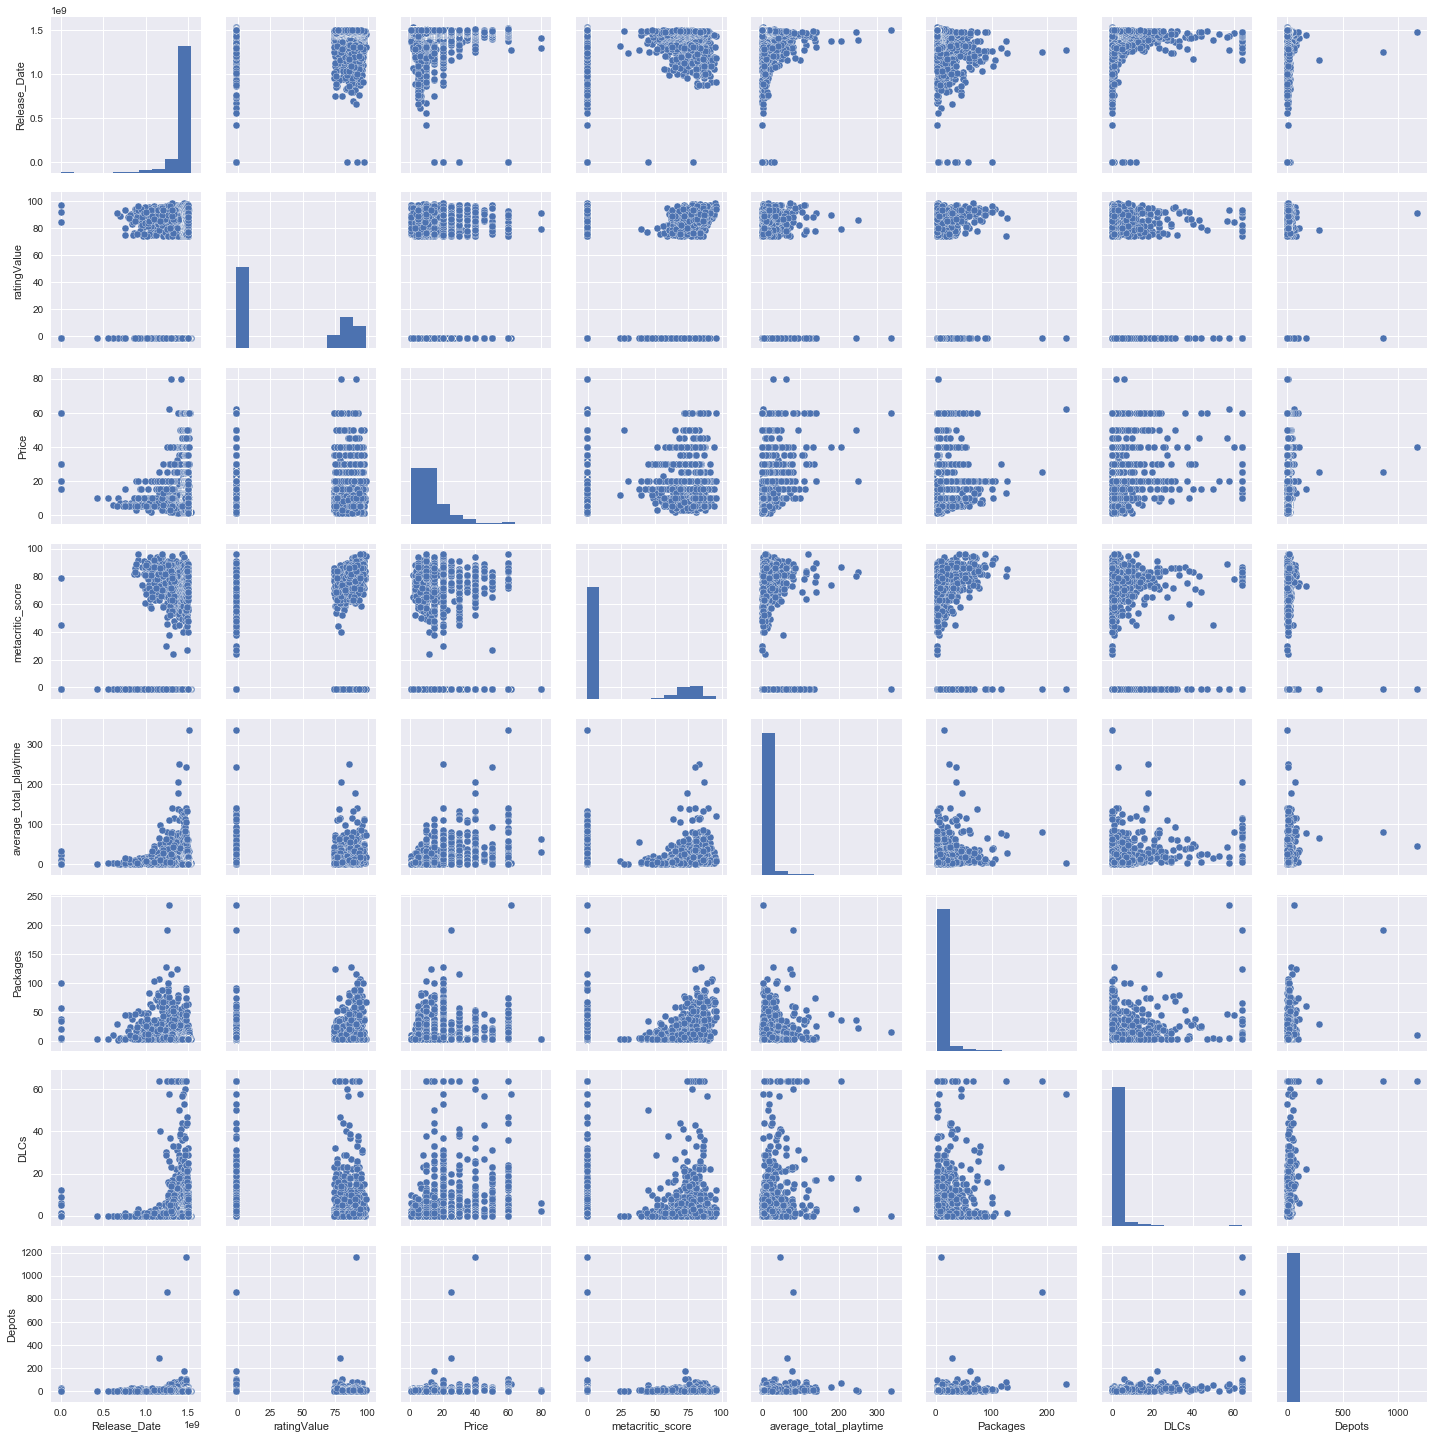

In [67]:
df_subset = df.loc[:,['Release_Date', 'ratingValue',
       'Price', 
       'metacritic_score',
       'average_total_playtime', 'Packages', 'DLCs', 'Depots']]
sns.pairplot(df_subset)

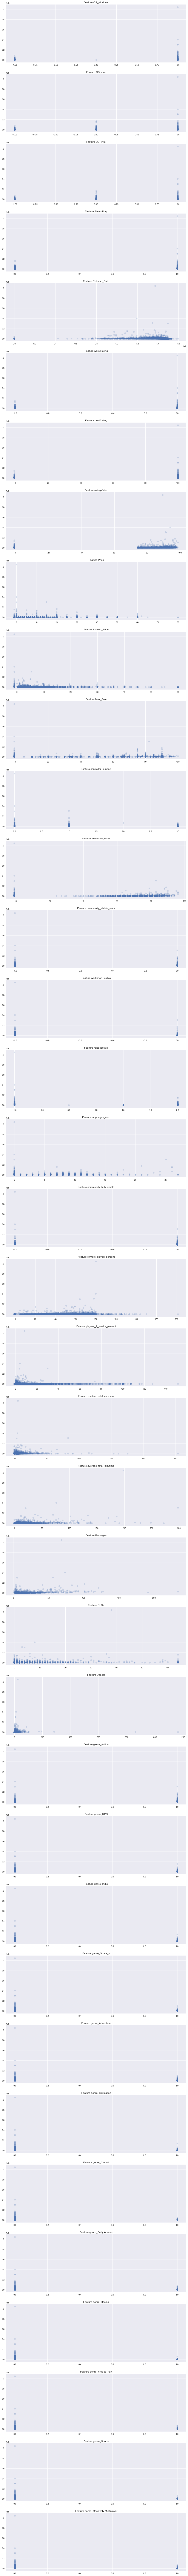

In [367]:
fig,ax = plt.subplots(ncols=1,nrows=len(X.columns),figsize=(15, 220))

for i,feature in enumerate(X):
    ax[i].scatter(X[feature],y,alpha=.2)
    ax[i].set_title("Feature "+str(feature))

In [368]:
"""('OS_windows', 0.0),
 ('OS_mac', 0.0),
 ('OS_linux', 0.0),
 ('SteamPlay', 0.0),
 ('Release_Date', -0.0003126391802476204),
 ('worstRating', -0.0),
 ('bestRating', -1567.3410435531523),
 ('ratingValue', 3593.9072708554922),
 ('Price', -0.0),
 ('Lowest_Price', -2081.2772418718241),
 ('Max_Sale', 1499.3564564871849),
 ('controller_support', 0.0),
 ('metacritic_score', 2105.4334582222991),
 ('community_visible_stats', 0.0),
 ('workshop_visible', 0.0),
 ('releasestate', -0.0),
 ('languages_num', 0.0),
 ('community_hub_visible', 0.0),
 ('owners_played_percent', 0.0),
 ('players_2_weeks_percent', -1.7373146986772761),
 ('median_total_playtime', -0.0),
 ('average_total_playtime', 6063.7059692453195),
 ('Packages', 22882.046944052454),
 ('DLCs', -0.0),
 ('Depots', -885.06284036310183),"""

"('OS_windows', 0.0),\n ('OS_mac', 0.0),\n ('OS_linux', 0.0),\n ('SteamPlay', 0.0),\n ('Release_Date', -0.0003126391802476204),\n ('worstRating', -0.0),\n ('bestRating', -1567.3410435531523),\n ('ratingValue', 3593.9072708554922),\n ('Price', -0.0),\n ('Lowest_Price', -2081.2772418718241),\n ('Max_Sale', 1499.3564564871849),\n ('controller_support', 0.0),\n ('metacritic_score', 2105.4334582222991),\n ('community_visible_stats', 0.0),\n ('workshop_visible', 0.0),\n ('releasestate', -0.0),\n ('languages_num', 0.0),\n ('community_hub_visible', 0.0),\n ('owners_played_percent', 0.0),\n ('players_2_weeks_percent', -1.7373146986772761),\n ('median_total_playtime', -0.0),\n ('average_total_playtime', 6063.7059692453195),\n ('Packages', 22882.046944052454),\n ('DLCs', -0.0),\n ('Depots', -885.06284036310183),"

## A closer look at a few of the more interesting features

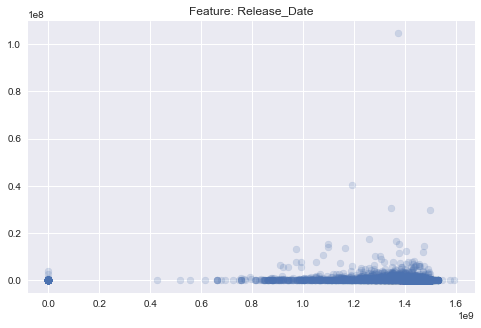

In [551]:
feature = 'Release_Date'
plt.figure(figsize=(8, 5))
plt.title("Feature: "+str(feature))
plt.scatter(X[feature],y,alpha=.2);

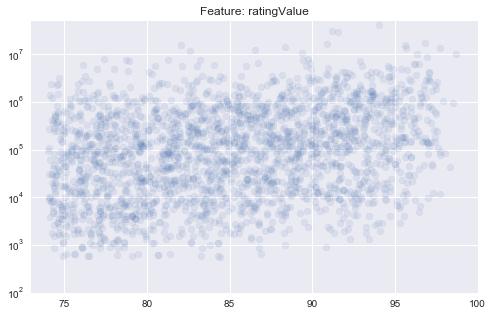

In [552]:
feature = 'ratingValue'
fig, ax =  plt.subplots(figsize=(8, 5))
ax.set_ylim(100,5e7)
ax.set_yscale('log')
ax.set_xlim(73,100)

ax.set_title("Feature: "+str(feature))
ax.scatter(X[feature],y,alpha=.1);

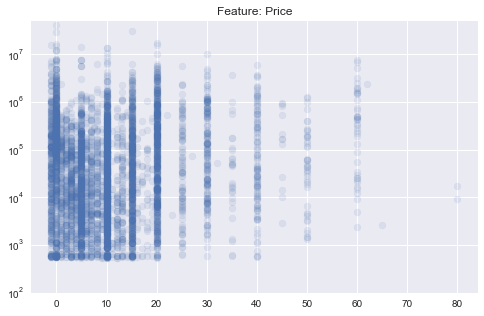

In [553]:
feature = 'Price'
fig, ax =  plt.subplots(figsize=(8, 5))
ax.set_ylim(100,5e7)
ax.set_yscale('log')
ax.set_title("Feature: "+str(feature))
ax.scatter(X[feature],y,alpha=.1);

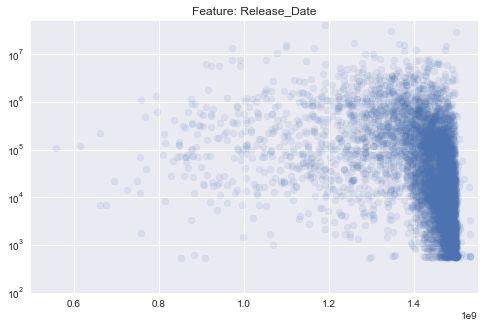

In [554]:
feature = 'Release_Date'
fig, ax =  plt.subplots(figsize=(8, 5))
ax.set_ylim(100,5e7)
ax.set_yscale('log')
ax.set_xlim(0.5e9,1.55e9)
ax.set_title("Feature: "+str(feature))
ax.scatter(X[feature],y,alpha=.1);

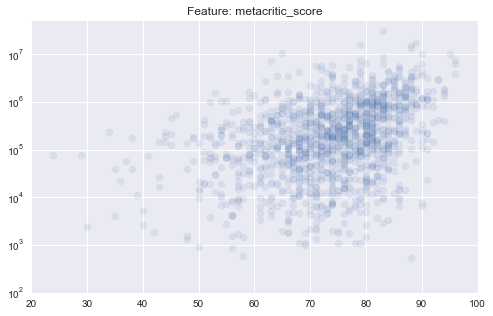

In [555]:
feature = 'metacritic_score'
fig, ax =  plt.subplots(figsize=(8, 5))
ax.set_ylim(100,5e7)
ax.set_yscale('log')
ax.set_xlim(20,100)
ax.set_title("Feature: "+str(feature))
ax.scatter(X[feature],y,alpha=.1);

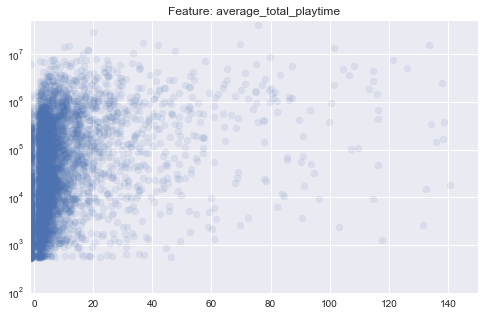

In [556]:
feature = 'average_total_playtime'
fig, ax =  plt.subplots(figsize=(8, 5))

ax.set_ylim(100,5e7)
ax.set_yscale('log')

ax.set_xlim(-1,150)

ax.set_title("Feature: "+str(feature))
ax.scatter(X[feature],y,alpha=.1);

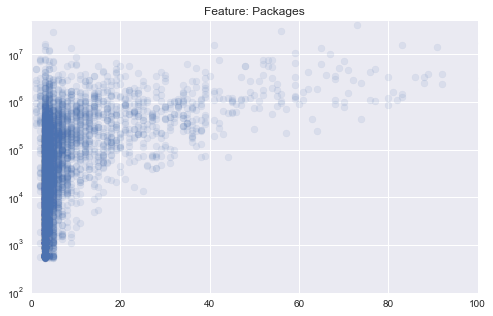

In [557]:
feature = 'Packages'
fig, ax =  plt.subplots(figsize=(8, 5))
ax.set_ylim(100,5e7)
ax.set_yscale('log')
ax.set_xlim(0,100)
ax.set_title("Feature: "+str(feature))
ax.scatter(X[feature],y,alpha=.1);

## and for the features I determined were 'cheating' due to being caused by the target
#### 'reviewCount', 'owners', 'owners_unc', 'players_total', 'players_2_weeks',

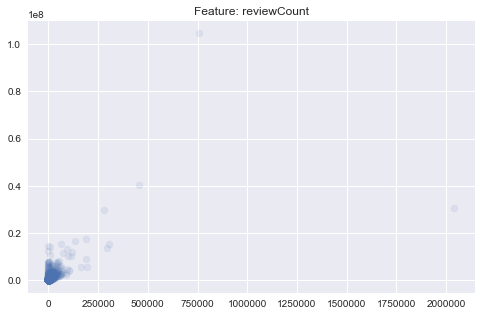

In [558]:
feature = 'reviewCount'
fig, ax =  plt.subplots(figsize=(8, 5))
ax.set_title("Feature: "+str(feature))
ax.scatter(df[feature],y,alpha=.1);

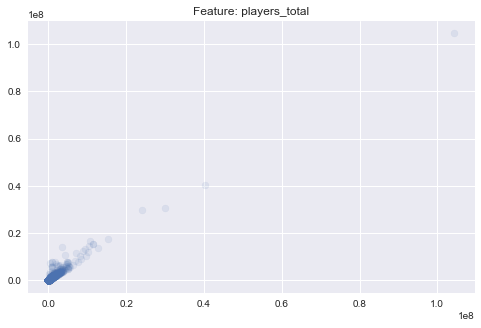

In [559]:
feature = 'players_total'
fig, ax =  plt.subplots(figsize=(8, 5))
ax.set_title("Feature: "+str(feature))
ax.scatter(df[feature],y,alpha=.1);

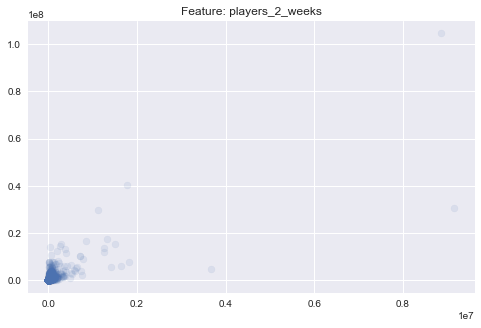

In [560]:
feature = 'players_2_weeks'
fig, ax =  plt.subplots(figsize=(8, 5))
ax.set_title("Feature: "+str(feature))
ax.scatter(df[feature],y,alpha=.1);

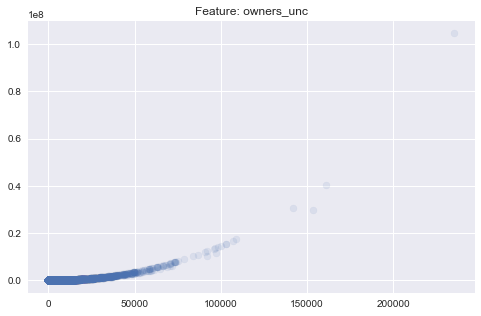

In [561]:
feature = 'owners_unc'
fig, ax =  plt.subplots(figsize=(8, 5))
ax.set_title("Feature: "+str(feature))
ax.scatter(df[feature],y,alpha=.1);

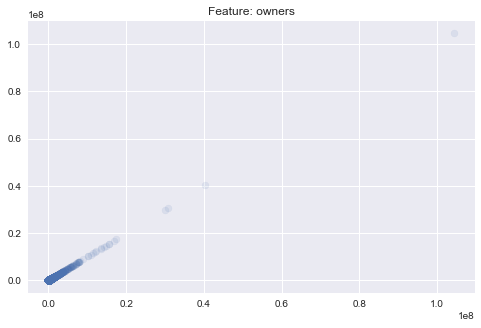

In [562]:
#just a verification
feature = 'owners'
fig, ax =  plt.subplots(figsize=(8, 5))
ax.set_title("Feature: "+str(feature))
ax.scatter(df[feature],y,alpha=.1);

In [563]:
df.describe()

,Unnamed: 0,ID_num,applicationCategory,OS_windows,OS_mac,OS_linux,SteamPlay,Release_Date,worstRating,bestRating,ratingValue,reviewCount,Price,Lowest_Price,Max_Sale,controller_support,metacritic_score,community_visible_stats,workshop_visible,releasestate,languages_num,community_hub_visible,owners,owners_unc,players_total,owners_played_percent,players_2_weeks,players_2_weeks_percent,median_total_playtime,average_total_playtime,Packages,DLCs,Depots,genre_Action,genre_Indie,genre_Strategy,genre_Simulation,genre_RPG,genre_Adventure,genre_Casual,genre_Early Access,genre_Racing,genre_Sports,genre_Free to Play,genre_Massively Multiplayer,owners_log
count,6998.000,6998.000,6998.0,6998.000,6998.000,6998.000,6998.000,6.998e+03,6998.000,6998.000,6998.000,6.998e+03,6998.000,6998.000,6998.000,6998.000,6998.000,6998.000,6998.000,6998.000,6998.000,6998.000,6.998e+03,6998.000,6.998e+03,6998.000,6.998e+03,6998.000,6998.000,6998.000,6998.000,6998.000,6998.000,6998.000,6998.000,6998.000,6998.000,6998.000,6998.000,6998.000,6998.000,6998.000,6998.000,6998.000,6998.000,6998.000
mean,3498.500,406504.949,0.0,0.821,0.265,0.162,0.377,1.362e+09,-0.662,33.148,28.058,2.019e+03,9.420,4.616,42.213,0.704,13.878,-0.413,-0.940,1.075,1.327,-0.193,2.681e+05,7440.700,1.867e+05,51.475,1.288e+04,6.754,2.589,6.761,6.411,1.871,4.487,0.416,0.525,0.197,0.161,0.144,0.263,0.190,0.129,0.044,0.053,0.009,0.022,3.320
std,2020.293,175538.127,0.0,0.571,0.611,0.561,0.485,3.088e+08,0.473,47.783,40.832,2.829e+04,10.702,6.923,32.646,1.074,30.127,0.492,0.238,1.381,3.183,0.395,1.688e+06,11864.643,1.551e+06,35.677,1.713e+05,15.670,7.775,16.034,10.739,6.055,19.029,0.493,0.499,0.397,0.367,0.351,0.440,0.393,0.335,0.206,0.225,0.097,0.148,2.435
min,0.000,10.000,0.0,-1.000,-1.000,-1.000,0.000,-1.000e+00,-1.000,-1.000,-1.000,-1.000e+00,-1.000,-1.000,-1.000,0.000,-1.000,-1.000,-1.000,-1.000,0.000,-1.000,-1.000e+00,-1.000,-1.000e+00,-1.000,-1.000e+00,-1.000,-1.000,-1.000,1.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-1.000
25%,1749.250,300290.000,0.0,1.000,0.000,0.000,0.000,1.400e+09,-1.000,-1.000,-1.000,-1.000e+00,0.000,0.590,-1.000,0.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,6.640e+02,967.000,5.820e+02,14.395,0.000e+00,0.000,-1.000,-1.000,3.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.822
50%,3498.500,416635.000,0.0,1.000,0.000,0.000,0.000,1.461e+09,-1.000,-1.000,-1.000,-1.000e+00,6.990,2.490,50.000,0.000,-1.000,0.000,-1.000,2.000,0.000,0.000,1.188e+04,3027.000,7.053e+03,59.990,6.230e+02,0.880,1.500,2.900,3.000,0.000,3.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.075
75%,5247.750,547492.500,0.0,1.000,1.000,1.000,1.000,1.489e+09,0.000,100.000,79.627,2.210e+02,14.990,6.490,75.000,1.000,-1.000,0.000,-1.000,2.000,0.000,0.000,1.161e+05,9494.500,6.642e+04,80.475,2.433e+03,6.150,3.500,6.700,5.000,1.000,5.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,5.065
max,6997.000,678620.000,0.0,1.000,1.000,1.000,1.000,1.595e+09,0.000,100.000,98.720,2.041e+06,79.990,59.990,100.000,3.000,96.000,0.000,0.000,2.000,27.000,0.000,1.045e+08,235425.000,1.044e+08,201.660,9.164e+06,151.190,253.900,298.000,234.000,64.000,1165.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,8.019


# Trying a simple tree model

In [564]:
## To start, we will build a single tree
from sklearn import tree

# Set some (starting) parameters
#dtrmodel = tree.DecisionTreeRegressor(min_samples_split=10, max_depth=4)
dtrmodel = tree.DecisionTreeRegressor(min_samples_split=10, max_depth=6, min_samples_leaf=8)

# Fit the model to some training data
dtrmodel.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=8, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [565]:
# Export the structure of the tree to a file

tree.export_graphviz(dtrmodel, out_file='tree.dot',feature_names = X_train.columns)

In [566]:
# Look at the file (using ! for a command line access)

!head tree.dot

digraph Tree {
node [shape=box] ;
0 [label="average_total_playtime <= 168.5\nmse = 3.52708844672e+12\nsamples = 4898\nvalue = 268822.3479"] ;
1 [label="Packages <= 47.5\nmse = 1.06533645794e+12\nsamples = 4889\nvalue = 235683.812"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="DLCs <= 3.5\nmse = 465697863723.0\nsamples = 4830\nvalue = 188900.7994"] ;
1 -> 2 ;
3 [label="Packages <= 9.5\nmse = 170741287019.0\nsamples = 4336\nvalue = 119518.6702"] ;
2 -> 3 ;
4 [label="players_2_weeks_percent <= 0.05\nmse = 107477662897.0\nsamples = 4012\nvalue = 83274.2984"] ;


# Now:
# 1) Open a new browser tab and go to http://webgraphviz.com 
# 2) Open the tree.dot file as a text file
# 3) Copy and Paste the text of the file into the webpage

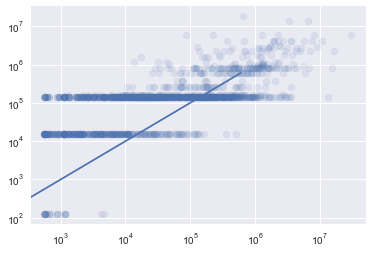

In [567]:
tree_pred_test = dtrmodel.predict(X_test)
plt.scatter(y_test, tree_pred_test,alpha=.1)
plt.xscale('log')
plt.yscale('log')
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000));


In [568]:
# Root Mean Square Error
np.sqrt(np.mean((tree_pred_test - y_test)**2))

1062601.3033310124

In [572]:
r2_score(y_test, tree_pred_test)

0.11056380423854739

# Need a better test metric due to logithmic nature of my target:

In [584]:
def MultiAbsError(test,prediction):
    MAD_log = np.mean(np.abs(prediction-test))
    return 10**MAD_log

In [583]:
MultiAbsError(y_test,tree_pred_test)

2674    1.532e+05
4326    1.275e+02
1877    4.949e+04
2130    1.125e+04
3131    1.124e+05
5348    5.537e+05
196     1.357e+06
1040    1.225e+03
427     2.556e+05
2622    1.354e+05
3273    1.347e+04
6606    1.275e+02
          ...    
6181    1.275e+02
2404    1.330e+04
730     5.097e+04
3834    1.357e+05
5071    1.459e+04
6660    1.275e+02
5116    1.275e+02
122     1.959e+05
326     1.726e+05
3773    1.477e+04
535     5.350e+05
2873    1.304e+05
Name: owners, Length: 2100, dtype: float64
253951.00409039552


OverflowError: (34, 'Result too large')

# Random Forrest

In [387]:
from sklearn.ensemble import RandomForestRegressor

In [388]:
# Initialize the model, then fit it on the training data

#this test run uses the parameters from the RealEstate date as a starting point
rfmodel1 = RandomForestRegressor(n_estimators = 500, min_samples_leaf=5, max_features=4, n_jobs=-1)
rfmodel1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [389]:
# Use the trained model to predict the results on the test set

rf1_test_pred = rfmodel1.predict(X_test)

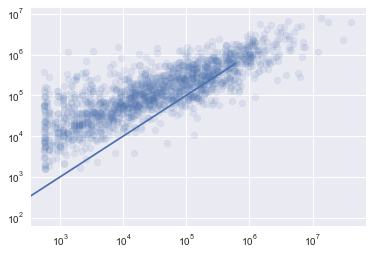

In [390]:
#Plot actual vs predicted
plt.scatter(y_test, rf1_test_pred,alpha=.1)
plt.xscale('log')
plt.yscale('log')
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000))



In [391]:
# Root Mean Square Error 
np.sqrt(np.mean((rf1_test_pred - y_test)**2))

1135371.1637758391

In [392]:
#R squared score
r2_score(y_test, rf1_test_pred)

0.31688732441961742

In [393]:
#look at the importance of each parameter:
coefs = rfmodel1.fit(X,y).feature_importances_   #note, run on whole dataset, not just X_train,y_train
sorted(zip(X.columns,coefs), key = lambda x:x[1], reverse=True)

[('average_total_playtime', 0.16246082000386955),
 ('Packages', 0.14354517821387575),
 ('DLCs', 0.078073626923153672),
 ('owners_played_percent', 0.068053842365112319),
 ('ratingValue', 0.065717456613174324),
 ('Release_Date', 0.057082279266867049),
 ('Depots', 0.055531502103785796),
 ('players_2_weeks_percent', 0.044857054629290814),
 ('median_total_playtime', 0.044575542312837113),
 ('languages_num', 0.035668545732316467),
 ('Lowest_Price', 0.033932694665065079),
 ('Max_Sale', 0.027372834535766045),
 ('metacritic_score', 0.025252401602746954),
 ('Price', 0.023609523027647416),
 ('releasestate', 0.02201458082116382),
 ('OS_linux', 0.018038588333842209),
 ('community_hub_visible', 0.012888867823194865),
 ('bestRating', 0.012769441461254531),
 ('worstRating', 0.012610678098653419),
 ('OS_mac', 0.0098605376922679608),
 ('SteamPlay', 0.0091426084574652532),
 ('community_visible_stats', 0.0070373363489510364),
 ('workshop_visible', 0.0052250103497694638),
 ('genre_Action', 0.00432115662055

0.351021135904


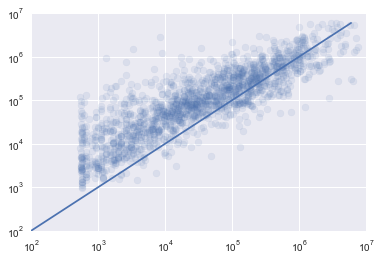

In [394]:
rfmodel1 = RandomForestRegressor(n_estimators = 200, min_samples_leaf=5,\
           max_features=9, n_jobs=-1, bootstrap=True)
rfmodel1.fit(X_train,y_train)
rf1_test_pred = rfmodel1.predict(X_test)

print(r2_score(y_test, rf1_test_pred))

plt.scatter(y_test, rf1_test_pred,alpha=.1)
plt.xscale('log')
plt.yscale('log')
plt.xlim(100,1e7)
plt.ylim(100,1e7)
plt.plot(np.linspace(0,6000000,1000),np.linspace(0,6000000,1000));

# Gradient Boosted Tree (best so far)

In [395]:
from sklearn.ensemble import GradientBoostingRegressor

In [396]:
gbmodel1 = GradientBoostingRegressor(subsample=0.8, learning_rate=0.11,\
                max_depth = 3,max_leaf_nodes=12,n_estimators=150,loss='huber',\
                min_samples_split=2)

In [397]:
gbmodel1.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.11, loss='huber', max_depth=3,
             max_features=None, max_leaf_nodes=12,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=150, presort='auto', random_state=None,
             subsample=0.8, verbose=0, warm_start=False)

In [398]:
gb1_test_pred = gbmodel1.predict(X_test)

0.158061785255


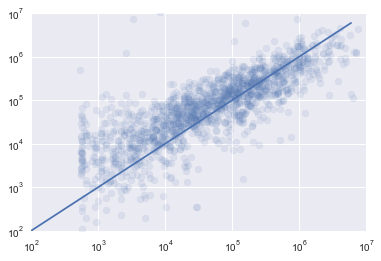

In [399]:
print(r2_score(y_test, gb1_test_pred))

plt.scatter(y_test, gb1_test_pred,alpha=.1)
plt.xscale('log')
plt.yscale('log')
plt.xlim(100,1e7)
plt.ylim(100,1e7)
plt.plot(np.linspace(0,6000000,1000),np.linspace(0,6000000,1000));

0.0148871990907


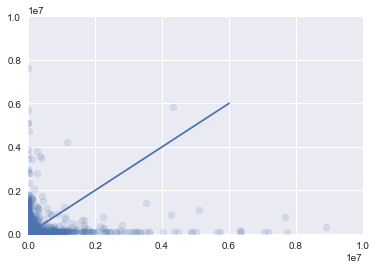

In [441]:
#try to tune this a little better (used the loops below)
gbmodel1 = GradientBoostingRegressor(subsample=0.8, learning_rate=.11,\
                max_depth = 10,max_leaf_nodes=7,n_estimators=120,loss='huber',\
                min_samples_split=4 )
gbmodel1.fit(X_train,y_train)
gb1_test_pred = gbmodel1.predict(X_test)

print(r2_score(y_test, gb1_test_pred))

plt.scatter(y_test, rf1_test_pred,alpha=.15)
#plt.xscale('log')
#plt.yscale('log')
plt.xlim(-100,1e7)
plt.ylim(-100,1e7)
plt.plot(np.linspace(0,6000000,1000),np.linspace(0,6000000,1000));

[ 0.4         0.42894737  0.45789474  0.48684211  0.51578947  0.54473684
  0.57368421  0.60263158  0.63157895  0.66052632  0.68947368  0.71842105
  0.74736842  0.77631579  0.80526316  0.83421053  0.86315789  0.89210526
  0.92105263  0.95      ]
0.4 0.40653081985
0.428947368421 0.188525754407
0.457894736842 0.190497804344
0.486842105263 0.248695251001
0.515789473684 0.225922579397
0.544736842105 0.266535065849
0.573684210526 0.262856621745
0.602631578947 0.260492203812
0.631578947368 0.130425092421
0.660526315789 0.243238393241
0.689473684211 0.229929209209
0.718421052632 0.209443540964
0.747368421053 0.21819810517
0.776315789474 0.206526169442
0.805263157895 0.230664930703
0.834210526316 0.23354211319
0.863157894737 0.28217097231
0.892105263158 0.255531711148
0.921052631579 0.279394001096
0.95 0.261251720805


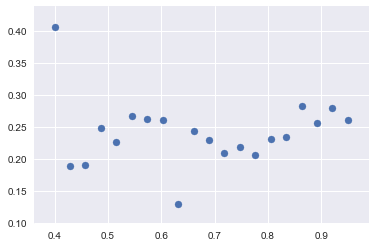

In [401]:
#searching for good tuning parameters
results = {}
space = np.linspace(0.4,0.95,20)
#space = [10,20,30,40,60,70,80,90,100,110,125,150,175,200,250,300,400]
print(space)
for i in space:
    gbmodel1 = GradientBoostingRegressor(subsample=0.8, learning_rate=.11,\
                max_depth = 10,max_leaf_nodes=7,n_estimators=120,loss='huber',\
                min_samples_split=4 )
    gbmodel1.fit(X_train,y_train)
    gb1_test_pred = gbmodel1.predict(X_test)
    Rsq = r2_score(y_test, gb1_test_pred)
    print(i,Rsq)
    results[i]=Rsq
results
plt.scatter(list(results.keys()),list(results.values()))

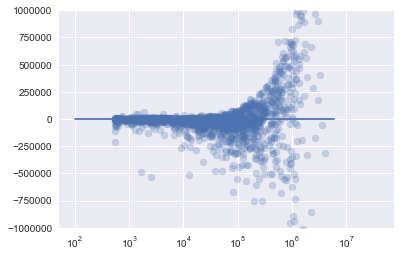

In [402]:
plt.scatter(y_test,y_test-gb1_test_pred,alpha=.25)
#plt.yscale('log')
plt.xscale('log')
plt.ylim(-1e6,1e6)
plt.plot(np.linspace(100,6000000,1000),np.linspace(0,0,1000))

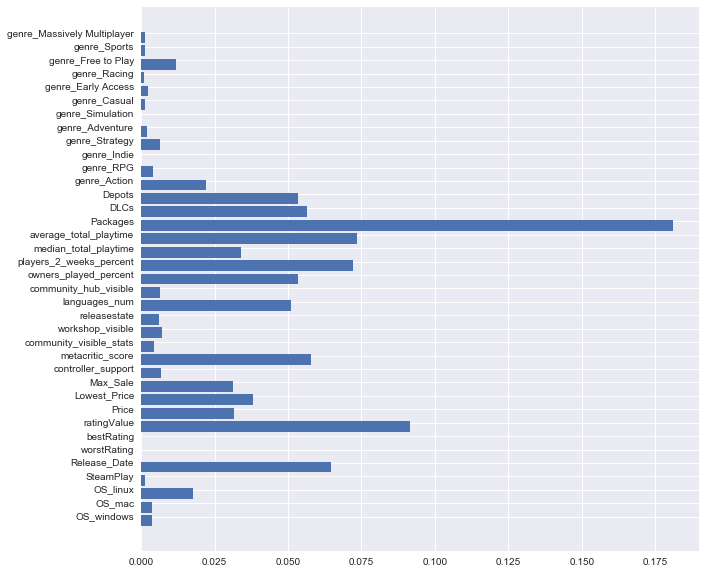

In [403]:
# Plot the "feature importances" given by the gb model - not super useful

fig, ax = plt.subplots(figsize=(10,10))

ind = np.array(range(len(X.columns)))+.7
plt.barh(ind,gbmodel1.feature_importances_);
ax.set_yticks(ind + .3);
ax.set_yticklabels((X_test.columns));

In [404]:
import ml_insights as mli

In [405]:
mxr = mli.ModelXRay(gbmodel1,X_test)

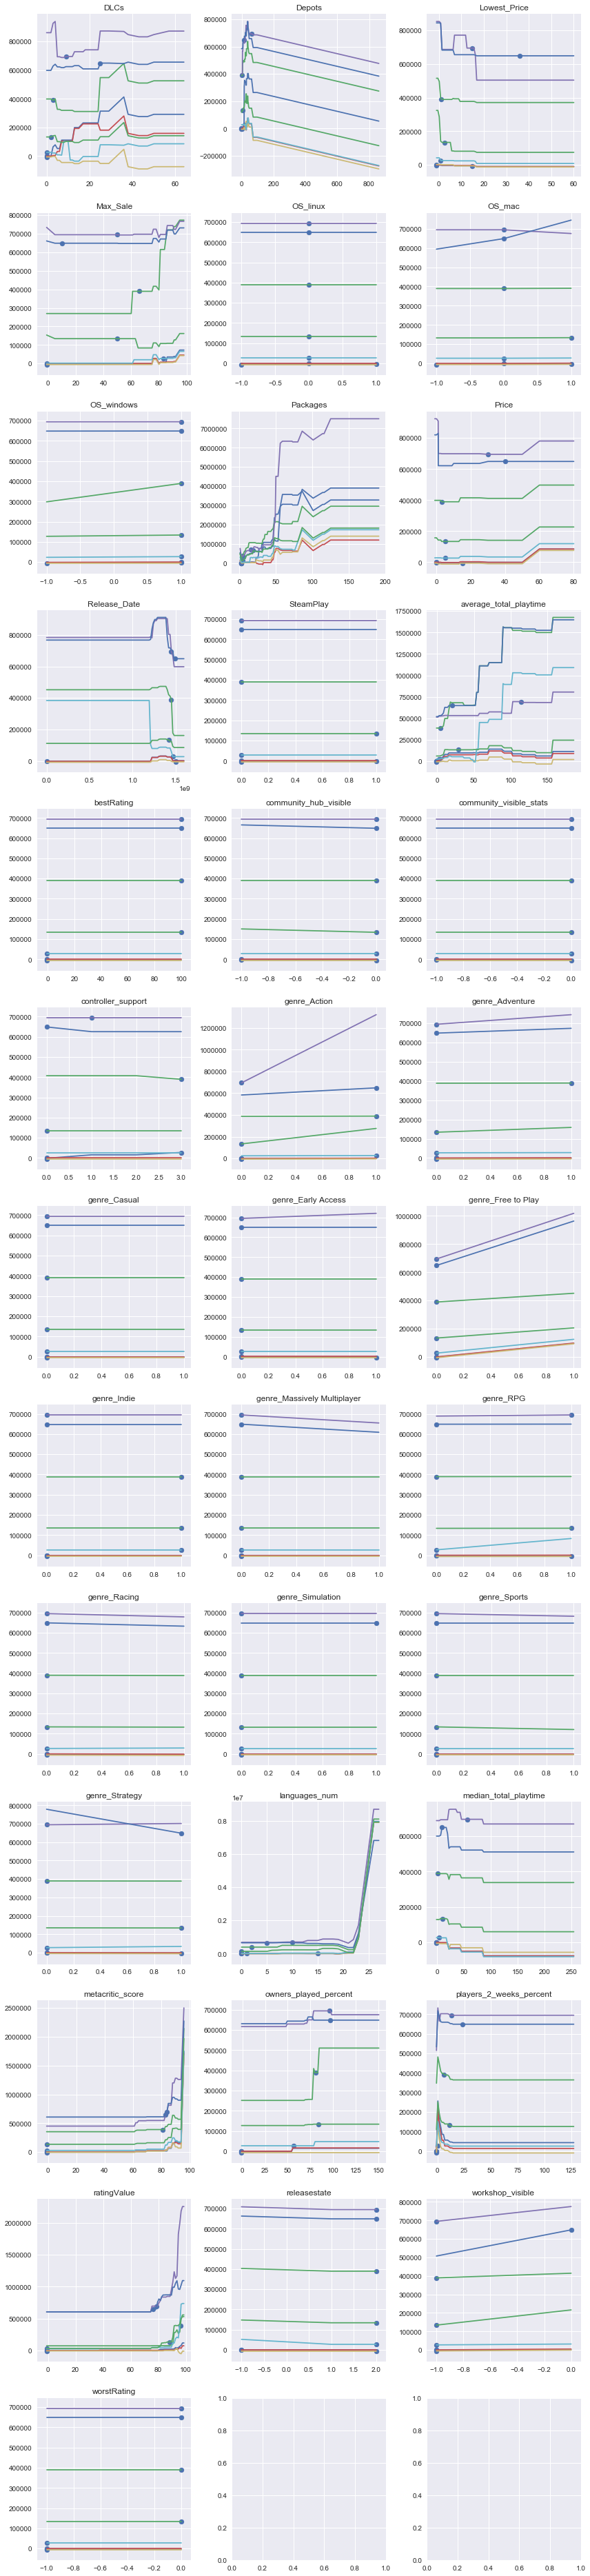

In [406]:
indices = mxr.feature_dependence_plots(num_pts=8)

# Trying out the LASSO

## Gradient Descent Algorithm

In [407]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV

In [408]:
lr_model2 = LinearRegression()
lr_model2.fit(X_train.loc[:,feature_columns],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [409]:
list(zip(feature_columns,lr_model2.coef_))

[('OS_windows', -72983.438158653356),
 ('OS_mac', 161529.1612736308),
 ('OS_linux', 223672.80269106795),
 ('SteamPlay', -183758.19106518355),
 ('Release_Date', 9.5455372502328828e-05),
 ('worstRating', -203.21499363612747),
 ('bestRating', -20524.707134481338),
 ('ratingValue', 26366.006464286838),
 ('Price', -18438.469548886758),
 ('Lowest_Price', 5575.2381638060906),
 ('Max_Sale', -90.443828866351396),
 ('controller_support', -9347.3569728566854),
 ('metacritic_score', -2855.4276330371795),
 ('community_visible_stats', -49210.57787045437),
 ('workshop_visible', -14000.004264682462),
 ('releasestate', -31791.429236979122),
 ('languages_num', 19224.133686102279),
 ('community_hub_visible', -283228.49774256052),
 ('owners_played_percent', 801.87410254596034),
 ('players_2_weeks_percent', -363.49234974948195),
 ('median_total_playtime', -48500.505601088269),
 ('average_total_playtime', 46469.860421430407),
 ('Packages', 40505.131568842466),
 ('DLCs', 23224.826873868929),
 ('Depots', -335

In [410]:
GD_test_set_prediction = lr_model2.predict(X_test.loc[:,feature_columns])
np.sqrt(np.mean((GD_test_set_prediction - y_test)**2))

1247188.6897618768

In [411]:
#R^2 score
r2_score(y_test, GD_test_set_prediction)

0.17570825234763709

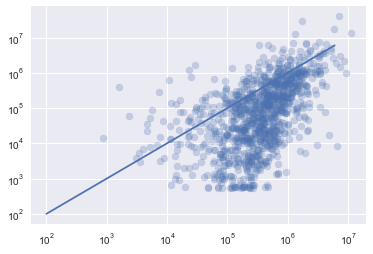

In [412]:
plt.scatter(GD_test_set_prediction,y_test,alpha=.25)
plt.yscale('log')
plt.xscale('log')
plt.plot(np.linspace(100,6000000,1000),np.linspace(100,6000000,1000))

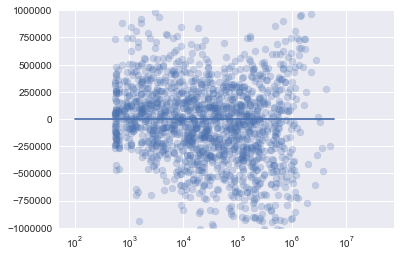

In [413]:
plt.scatter(y_test,y_test-GD_test_set_prediction,alpha=.25)
#plt.yscale('log')
plt.xscale('log')
plt.ylim(-1e6,1e6)
plt.plot(np.linspace(100,6000000,1000),np.linspace(0,0,1000))

In [414]:
#LASSO!!
LinearRegression_2 = Lasso(alpha = 250000)
LinearRegression_2.fit(X_train.loc[:,feature_columns],y_train)


Lasso(alpha=250000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [415]:
list(zip(feature_columns,LinearRegression_2.coef_))

[('OS_windows', 0.0),
 ('OS_mac', 0.0),
 ('OS_linux', 0.0),
 ('SteamPlay', 0.0),
 ('Release_Date', 7.4280005081255173e-05),
 ('worstRating', -0.0),
 ('bestRating', -0.0),
 ('ratingValue', 2978.4881895947956),
 ('Price', -16917.228239192951),
 ('Lowest_Price', -0.0),
 ('Max_Sale', -2261.4849144149794),
 ('controller_support', 0.0),
 ('metacritic_score', -1743.0766444465607),
 ('community_visible_stats', 0.0),
 ('workshop_visible', 0.0),
 ('releasestate', -0.0),
 ('languages_num', 0.0),
 ('community_hub_visible', -0.0),
 ('owners_played_percent', 318.03619472667998),
 ('players_2_weeks_percent', -282.92064845919407),
 ('median_total_playtime', -37686.590257370684),
 ('average_total_playtime', 42080.719609080472),
 ('Packages', 38624.513198512621),
 ('DLCs', 15014.272896860373),
 ('Depots', -1310.0229905765048),
 ('genre_Action', 0.0),
 ('genre_RPG', -0.0),
 ('genre_Indie', 0.0),
 ('genre_Strategy', -0.0),
 ('genre_Adventure', 0.0),
 ('genre_Simulation', -0.0),
 ('genre_Casual', -0.0),
 (

In [416]:
LinearRegression_2_pred = LinearRegression_2.predict(X_test.loc[:,feature_columns])

0.175820759633


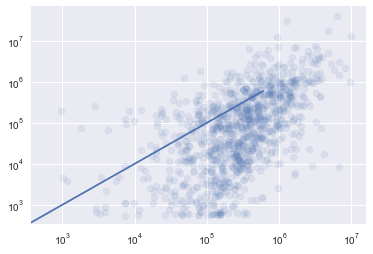

In [417]:
print(r2_score(y_test, LinearRegression_2_pred))

plt.scatter(LinearRegression_2_pred,y_test,alpha=.1)
plt.yscale('log')
plt.xscale('log')
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000))

## trying out Andrew's Cross-Validation

In [418]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
#std.fit(X_train.values.astype(float))
std.fit(X_train)



StandardScaler(copy=True, with_mean=True, with_std=True)

In [419]:
# This next block of code will run a cross-validation

alphalist = 10**(np.linspace(2,8,200))#linspace(-3,4,200))
err_vec_test = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    steps = [('standardize', StandardScaler()), ('lasso', Lasso(alpha = curr_alpha))]
#    steps = [('standardize', StandardScaler()), ('ridge', Ridge(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.loc[:,feature_columns], y_train)
    test_set_pred7 = pipe.predict(X_test.loc[:,feature_columns])
    err_vec_test[i] = np.sqrt(np.mean((test_set_pred7 - y_test)**2))

    train_set_pred7 = pipe.predict(X_train.loc[:,feature_columns])
    err_vec_train[i] = np.sqrt(np.mean((train_set_pred7 - y_train)**2))

/Users/dlicht/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dlicht/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dlicht/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dlicht/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not co

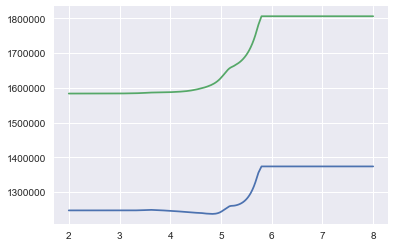

In [420]:
plt.plot(np.log10(alphalist),err_vec_test)
plt.plot(np.log10(alphalist),err_vec_train)

In [421]:
alphalist[np.argmin(err_vec_test)]

68260.718342723791

In [422]:
from sklearn.linear_model import lars_path

In [423]:
std = StandardScaler()
#std.fit(X_train.values.astype(float))
std.fit(X_train)

X_tr = std.transform(X_train)
X_te = std.transform(X_test)

In [424]:
## Note: lars_path takes numpy matrices, not pandas dataframes

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso', verbose=True)

Computing regularization path using the LARS ...
.

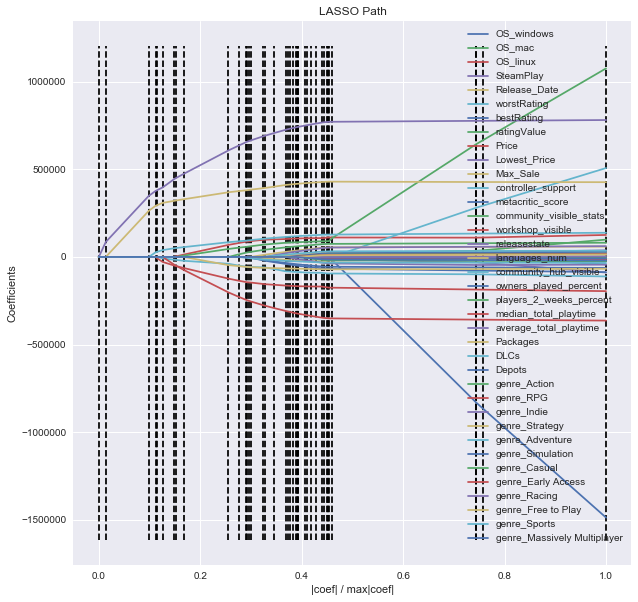

In [425]:
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
#plt.xscale('log')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()

## re-running Boosted Trees using only the more effective features:

In [426]:
#only features with importances above 0.04
"""best_features = ['Release_Date',
       'ratingValue', 'Max_Sale',
       'languages_num',
       'players_total',
       'owners_played_percent', 'players_2_weeks_percent',
       'median_total_playtime', 'average_total_playtime', 'Packages', 'Depots']
"""
best_features = ['Release_Date','ratingValue','metacritic_score']   
#best_features = ['ratingValue','metacritic_score']  

#as choosen by Lasso
#best_features = ['Release_Date','reviewCount','owners','owners_unc','players_total','players_2_weeks']

y = df.loc[:,"owners"]
X = df.loc[:,best_features]
#Split the data 70-30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
len(X.columns)

3

0.0346037266085


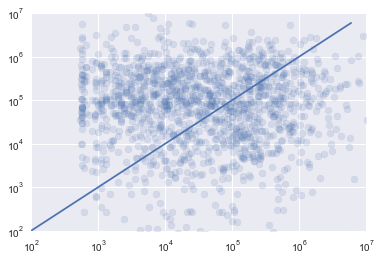

In [427]:
best_features = ['ratingValue','metacritic_score']   

y = df.loc[:,"owners"]
X = df.loc[:,best_features]
#Split the data 70-30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
len(X.columns)

gbmodel1 = GradientBoostingRegressor(subsample=0.8, learning_rate=.11,\
                max_depth = 10,max_leaf_nodes=7,n_estimators=200,loss='huber',\
                min_samples_split=4 )
gbmodel1.fit(X_train,y_train)
gb1_test_pred = gbmodel1.predict(X_test)

print(r2_score(y_test, gb1_test_pred))

plt.scatter(y_test, rf1_test_pred,alpha=.15)
plt.xscale('log')
plt.yscale('log')
plt.xlim(100,1e7)
plt.ylim(100,1e7)
plt.plot(np.linspace(0,6000000,1000),np.linspace(0,6000000,1000));

0.104000392169


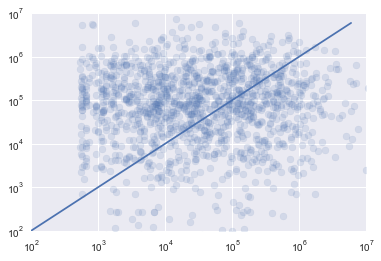

In [428]:
best_features = ['Release_Date','ratingValue','metacritic_score']   

y = df.loc[:,"owners"]
X = df.loc[:,best_features]
#Split the data 70-30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
len(X.columns)

gbmodel1 = GradientBoostingRegressor(subsample=0.7, learning_rate=.05,\
                max_depth = 10,max_leaf_nodes=7,n_estimators=120,loss='huber',\
                min_samples_split=4 )
gbmodel1.fit(X_train,y_train)
gb1_test_pred = gbmodel1.predict(X_test)

print(r2_score(y_test, gb1_test_pred))

plt.scatter(y_test, rf1_test_pred,alpha=.15)
plt.xscale('log')
plt.yscale('log')
plt.xlim(100,1e7)
plt.ylim(100,1e7)
plt.plot(np.linspace(0,6000000,1000),np.linspace(0,6000000,1000));

### trying out gridsearch to improve this

In [429]:
from sklearn.model_selection import GridSearchCV

In [430]:
parameters = {'subsample':np.arange(.65,0.95,.05),
              #'max_depth':[4,5,6],
              'learning_rate':np.arange(.001,.010,.001),
              'n_estimators':[180,200,250]}

model = GradientBoostingRegressor()
grid_search = GridSearchCV(model, parameters, n_jobs=-3, verbose=1)   #note n_jobs = -2 means all but one core
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-3)]: Done  38 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-3)]: Done 188 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-3)]: Done 438 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-3)]: Done 486 out of 486 | elapsed:   25.0s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=-3,
       param_grid={'subsample': array([ 0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ]), 'learning_rate': array([ 0.001,  0.002,  0.003,  0.004,  0.005,  0.006,  0.007,  0.008,
        0.009]), 'n_estimators': [180, 200, 250]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [431]:
grid_search.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.0090000000000000011, loss='ls', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=250, presort='auto', random_state=None,
             subsample=0.8500000000000002, verbose=0, warm_start=False)

0.0716543163376


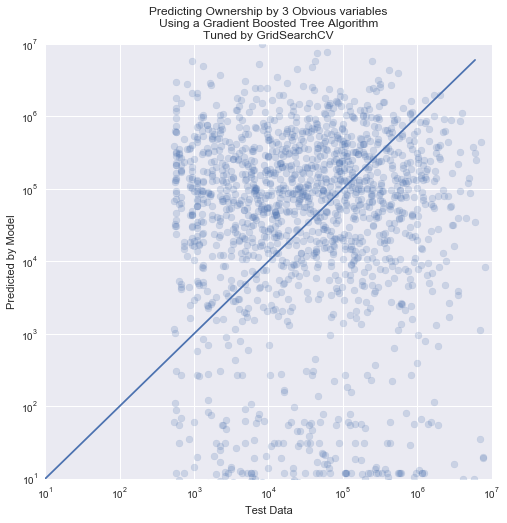

In [432]:
best_features = ['Release_Date','ratingValue','metacritic_score']   

y = df.loc[:,"owners"]
X = df.loc[:,best_features]
#Split the data 70-30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
len(X.columns)

gbmodel1 = GradientBoostingRegressor(subsample=0.9, learning_rate=.008,\
                max_depth = 3,max_leaf_nodes=7,n_estimators=250,\
                min_samples_split=4 )
gbmodel1.fit(X_train,y_train)
gb1_test_pred = gbmodel1.predict(X_test)

print(r2_score(y_test, gb1_test_pred))

plt.figure(figsize=(8,8))
plt.scatter(y_test, rf1_test_pred,alpha=.2)
plt.xscale('log')
plt.yscale('log')
plt.xlim(10,1e7)
plt.ylim(10,1e7)
plt.xlabel("Test Data")
plt.ylabel("Predicted by Model")
plt.title("Predicting Ownership by 3 Obvious variables\nUsing a Gradient Boosted Tree Algorithm\nTuned by GridSearchCV")
plt.plot(np.linspace(0,6000000,1000),np.linspace(0,6000000,1000));

In [433]:
best_features = ['ratingValue','metacritic_score']   #- ratings only!

y = df.loc[:,"owners"]
X = df.loc[:,best_features]
#Split the data 70-30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

parameters = {'subsample':np.arange(.65,0.95,.05),
              #'max_depth':[4,5,6],
              'learning_rate':np.arange(.001,.010,.001),
              'n_estimators':[180,200,250]}

model = GradientBoostingRegressor()
grid_search = GridSearchCV(model, parameters, n_jobs=-3, verbose=1)   #note n_jobs = -2 means all but one core
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-3)]: Done  38 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-3)]: Done 188 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-3)]: Done 438 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-3)]: Done 486 out of 486 | elapsed:   20.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=-3,
       param_grid={'subsample': array([ 0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ]), 'learning_rate': array([ 0.001,  0.002,  0.003,  0.004,  0.005,  0.006,  0.007,  0.008,
        0.009]), 'n_estimators': [180, 200, 250]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [434]:
grid_search.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.0060000000000000001, loss='ls', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=None,
             subsample=0.70000000000000007, verbose=0, warm_start=False)

0.0724244570749


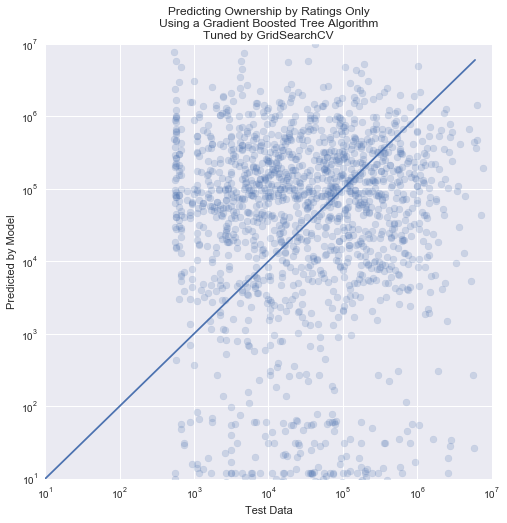

In [435]:
best_features = ['ratingValue','metacritic_score']   

y = df.loc[:,"owners"]
X = df.loc[:,best_features]
#Split the data 70-30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
len(X.columns)

gbmodel1 = GradientBoostingRegressor(subsample=0.7, learning_rate=.005,\
                max_depth = 3,max_leaf_nodes=7,n_estimators=250,\
                min_samples_split=4 )
gbmodel1.fit(X_train,y_train)
gb1_test_pred = gbmodel1.predict(X_test)

print(r2_score(y_test, gb1_test_pred))

plt.figure(figsize=(8,8))
plt.scatter(y_test, rf1_test_pred,alpha=.2)
plt.xscale('log')
plt.yscale('log')
plt.xlim(10,1e7)
plt.ylim(10,1e7)
plt.xlabel("Test Data")
plt.ylabel("Predicted by Model")
plt.title("Predicting Ownership by Ratings Only\nUsing a Gradient Boosted Tree Algorithm\nTuned by GridSearchCV")
plt.plot(np.linspace(0,6000000,1000),np.linspace(0,6000000,1000));

## Random forrest on just a few obvious variables:

0.0518760421604


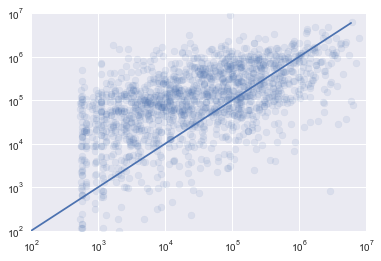

In [436]:

best_features = ['Release_Date','ratingValue','metacritic_score']   

y = df.loc[:,"owners"]
X = df.loc[:,best_features]
#Split the data 70-30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
len(X.columns)

rfmodel1 = RandomForestRegressor(n_estimators = 300, min_samples_leaf=3,\
           max_features=3, n_jobs=-2, bootstrap=True)
rfmodel1.fit(X_train,y_train)
rf1_test_pred = rfmodel1.predict(X_test)

print(r2_score(y_test, rf1_test_pred))

plt.scatter(y_test, rf1_test_pred,alpha=.1)
plt.xscale('log')
plt.yscale('log')
plt.xlim(100,1e7)
plt.ylim(100,1e7)
plt.plot(np.linspace(0,6000000,1000),np.linspace(0,6000000,1000));

-0.2191843073


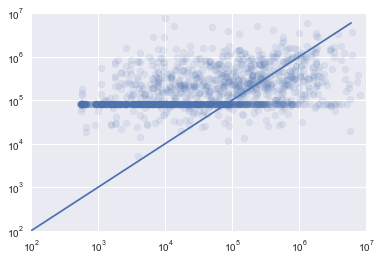

In [437]:

best_features = ['ratingValue','metacritic_score']   

y = df.loc[:,"owners"]
X = df.loc[:,best_features]
#Split the data 70-30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
len(X.columns)

rfmodel1 = RandomForestRegressor(n_estimators = 100, min_samples_leaf=3,\
           max_features=2, n_jobs=-2, bootstrap=True)
rfmodel1.fit(X_train,y_train)
rf1_test_pred = rfmodel1.predict(X_test)

print(r2_score(y_test, rf1_test_pred))

plt.scatter(y_test, rf1_test_pred,alpha=.1)
plt.xscale('log')
plt.yscale('log')
plt.xlim(100,1e7)
plt.ylim(100,1e7)
plt.plot(np.linspace(0,6000000,1000),np.linspace(0,6000000,1000));

## Gradient Descent on 'obvious' columns

[ -1.06914060e-04   4.24973590e+03   4.83710863e+03]
0.0150543152642


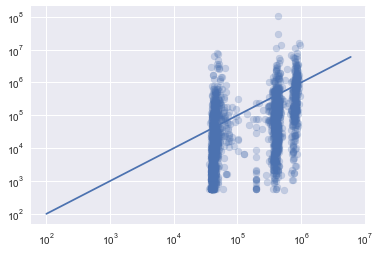

In [438]:

best_features = ['Release_Date','ratingValue','metacritic_score']   

y = df.loc[:,"owners"]
X = df.loc[:,best_features]
#Split the data 70-30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
len(X.columns)


lr_model3 = LinearRegression()
lr_model3.fit(X_train.loc[:,best_features],y_train)

GD_test_set_prediction = lr_model3.predict(X_test.loc[:,best_features])
print(lr_model3.coef_)

#R^2 score
print(r2_score(y_test, GD_test_set_prediction))

plt.scatter(GD_test_set_prediction,y_test,alpha=.25)
plt.yscale('log')
plt.xscale('log')
plt.plot(np.linspace(100,6000000,1000),np.linspace(100,6000000,1000));

[ 4369.23873043  4839.46173569]
0.0133989550852


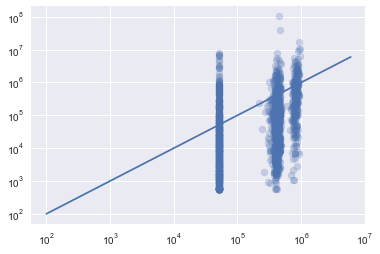

In [439]:

best_features = ['ratingValue','metacritic_score']   

y = df.loc[:,"owners"]
X = df.loc[:,best_features]
#Split the data 70-30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
len(X.columns)


lr_model3 = LinearRegression()
lr_model3.fit(X_train.loc[:,best_features],y_train)

GD_test_set_prediction = lr_model3.predict(X_test.loc[:,best_features])
print(lr_model3.coef_)

#R^2 score
print(r2_score(y_test, GD_test_set_prediction))

plt.scatter(GD_test_set_prediction,y_test,alpha=.25)
plt.yscale('log')
plt.xscale('log')
plt.plot(np.linspace(100,6000000,1000),np.linspace(100,6000000,1000));